# Shock Problems from Textbook

Ashish Dhanalakota

In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

# Question 7.7, Part A (incomplete)

In [2]:
gamma1 = 1.4
gamma4 = 1.4

T1 = 300 # K
P1 = 0.1 * 101325 # Pa
P2 = P1 * 40.4 # P2/P1 = 40.4

In [3]:
# Using P2/P1 and NS relations
Ma1s = symbols('Ma1s')
# NS function
Mach_eq = Eq(P2/P1, 1 + 2 * gamma1 * (Ma1s**2 - 1) / (gamma1 + 1))
Ma1_array = solve(Mach_eq, Ma1s)
Ma1 = -1

for i in range(len(Ma1_array)):
    if Ma1_array[i] > 1:
        Ma1 = Ma1_array[i]
        break

if Ma1 == -1:
    raise Exception('Ma1 unable to be found')
    
# NS function
T2 = T1 * (1 + (2*(gamma1-1)*(Ma1**2-1)*(gamma1*Ma1**2+1)/(gamma1+1)/(gamma1+1)/(Ma1**2)))

T2/T1

7.70156121610517

# Question 7.10: Calculations

Note that the problem only gives values for `T1`, `T4`, and `P4/P1`. I used an arbitrary value for `P1` to get numerical data to make plots that this question does not ask for.

In [4]:
# Known constants
gamma = 1.4
gm1 = gamma - 1
gp1 = gamma + 1
R = 287 # J/(kg*K)

# Given variables
T1 = 300 # K
T4 = 300 # K
P1 = 100 # kPa
P4 = P1 * 5 # P4/P1 = 5

The code below is where I tried to implement Equation 7.94, which solves for `P4/P1` with `P2/P1`, `gamma`, `a1`, and `a4`. Python was unable to solve for `P2/P1`, so I used WolframAlpha to solve for this instead.

In [5]:
a1 = np.sqrt(gamma * R * T1)
a4 = np.sqrt(gamma * R * T4)

# P2_P1x = symbols('P2_P1x')

# Equation 7.93
# power = -2 * gamma / gm1
# numerator = gm1 * (a1/a4) * (P2_P1x - 1)
# denominator = 2 * gamma * (2 * gamma + gp1 * (P2_P1x - 1))
# eq1 = Eq(P4/P1, P2_P1x * (1 - numerator/sqrt(denominator))**power)
# P2_P1 = solve(eq1, P2_P1x)

# NOTE: This code is not working right now

P2_P1 = 2.12787 # from WolframAlpha
P2 = P1 * P2_P1

Solve for `T2` and `T3`.

In [6]:
numerator = gp1/gm1 + P2_P1
denominator = 1 + gp1*P2_P1/gm1
T2 = T1 * P2_P1 * numerator/denominator # K

T2

376.8745775160126

In [7]:
P3_P4 = P2_P1/(P4/P1) # P3/P4 = P2/P4
P3 = P4 * P3_P4 # kPa

T3 = T4 * P3_P4**(gm1/gamma) # K

T3

235.02504083554376

In [8]:
W = a1*np.sqrt(gp1/2/gamma*(P2_P1 - 1) + 1) # m/s
up = a1/gamma * (P2_P1 - 1) * np.sqrt(2*gamma/(P2_P1*gp1 + gm1)) # m/s
U1 = 0
u2 = up

up

199.44469852651022

In [9]:
a3 = np.sqrt(gamma * R * T3) # m/s

a3

307.29962806310306

Check pressure values.

In [10]:
print(f'P1: {P1} kPa')
print(f'P2: {P2} kPa')
print(f'P3: {P3} kPa')
print(f'P4: {P4} kPa')

P1: 100 kPa
P2: 212.787 kPa
P3: 212.787 kPa
P4: 500 kPa


# Question 7.10: Plots

`points` gives the number of data points that will be solved for and plotted for each plot. `diaphragm` determines the x-value of the diaphragm in the shock tube.

In [11]:
points = 500
diaphragm = 200 # location of diaphragm
x_arr = np.zeros((points,))

This plot is to see the pressure distribution in the shock tube right before the membrane bursts, at time `t` = 0.

In [12]:
P_before = np.zeros((points,))

for i in range(points):
    x_arr[i] = i
    if i < diaphragm:
        P_before[i] = P4
    else:
        P_before[i] = P1

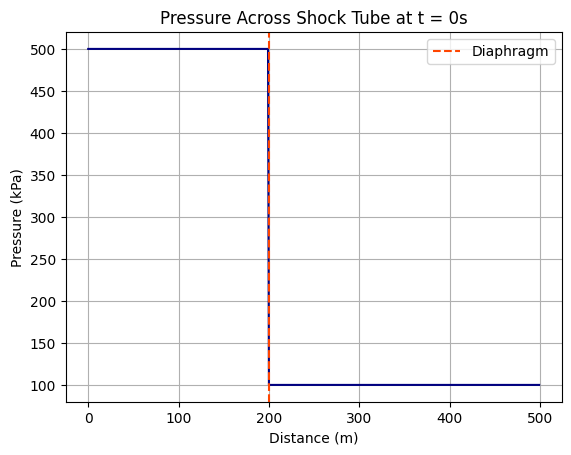

In [13]:
plt.plot(x_arr, P_before, color='navy')
plt.axvline(x = diaphragm, color = 'orangered', linestyle='dashed', label='Diaphragm')
plt.legend()
plt.ylabel('Pressure (kPa)')
plt.xlabel('Distance (m)')
plt.title('Pressure Across Shock Tube at t = 0s')
plt.grid()
plt.show()

This plot is to see the pressure distribution in the shock tube after the membrane bursts, at time `t`. Here, `t` is arbitrarily chosen.

In [14]:
t = 0.3 # s (arbitrary)

xhd = diaphragm - a1 * t # head of rarefaction
xft = diaphragm + (up - a3) * t # foot of rarefaction
xcd = diaphragm + up * t # contact discontinuity
xsh = diaphragm + W * t # shock wave

xhd

95.84338715184715

In [15]:
P_arr = np.zeros((points,))

for i in range(points):
    if i < xhd:
        P_arr[i] = P4
    elif i < xft:
        u = 2 / gp1 * (a4 + (x_arr[i] - diaphragm) / t)
        fact = 1 - 0.5 * gm1 * u / a4
        P_arr[i] = P4 * fact ** (2 * gamma / gm1)
    elif i < xcd:
        P_arr[i] = P3
    elif i < xsh:
        P_arr[i] = P2
    else:
        P_arr[i] = P1

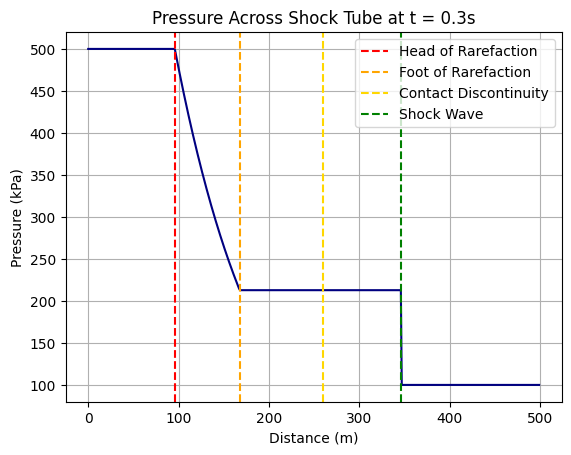

In [16]:
plt.plot(x_arr, P_arr, color='navy')
plt.axvline(x = xhd, color = 'red', linestyle='dashed', label='Head of Rarefaction')
plt.axvline(x = xft, color = 'orange', linestyle='dashed', label='Foot of Rarefaction')
plt.axvline(x = xcd, color = 'gold', linestyle='dashed', label='Contact Discontinuity')
plt.axvline(x = xsh, color = 'g', linestyle='dashed', label='Shock Wave')
plt.legend()
plt.ylabel('Pressure (kPa)')
plt.xlabel('Distance (m)')
plt.title(f'Pressure Across Shock Tube at t = {t}s')
plt.grid()
plt.show()

In [17]:
rho1 = P1/(R*T1)
rho2 = rho1 * ((1 + gp1*P2/(gm1*P1))/(gp1/gm1 + P2/P1))
rho4 = P4/(R*T4)
rho3 = (P3/P4)**(1/gamma) * rho4

print('rho1: ', rho1)
print('rho2: ', rho2)
print('rho3: ', rho3)
print('rho4: ', rho4)

rho1:  0.0011614401858304297
rho2:  0.001967280794989143
rho3:  0.003154634569282761
rho4:  0.005807200929152149


This plot is to see the density distribution inside the shock tube at time `t`.

In [18]:
rho_arr = np.zeros((points,))

for i in range(points):
    if i < xhd:
        rho_arr[i] = rho4
    elif i < xft:
        rho_arr[i] = rho4 * (P_arr[i]/P4)**(1/gamma)
    elif i < xcd:
        rho_arr[i] = rho3
    elif i < xsh:
        rho_arr[i] = rho2
    else:
        rho_arr[i] = rho1

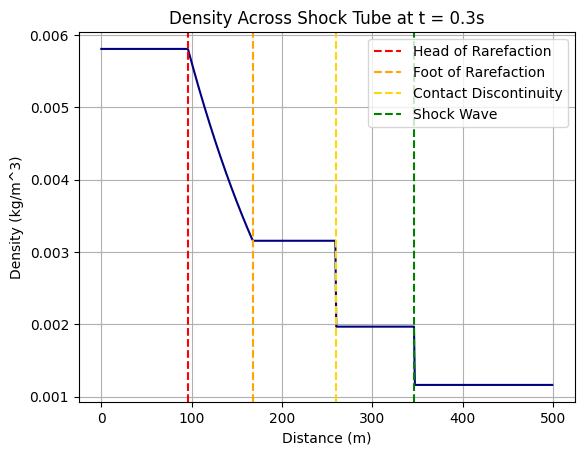

In [19]:
plt.plot(x_arr, rho_arr, color='navy')
plt.axvline(x = xhd, color = 'red', linestyle='dashed', label='Head of Rarefaction')
plt.axvline(x = xft, color = 'orange', linestyle='dashed', label='Foot of Rarefaction')
plt.axvline(x = xcd, color = 'gold', linestyle='dashed', label='Contact Discontinuity')
plt.axvline(x = xsh, color = 'g', linestyle='dashed', label='Shock Wave')
plt.legend()
plt.ylabel('Density (kg/m^3)')
plt.xlabel('Distance (m)')
plt.title(f'Density Across Shock Tube at t = {t}s')
plt.grid()
plt.show()

This plot is to see the temperature distribution inside the shock tube at time `t`.

In [20]:
T_arr = np.zeros((points,))

for i in range(points):
    if i < xhd:
        T_arr[i] = T4
    elif i < xft:
        T_arr[i] = P_arr[i]/(R*rho_arr[i])
    elif i < xcd:
        T_arr[i] = T3
    elif i < xsh:
        T_arr[i] = T2
    else:
        T_arr[i] = T1

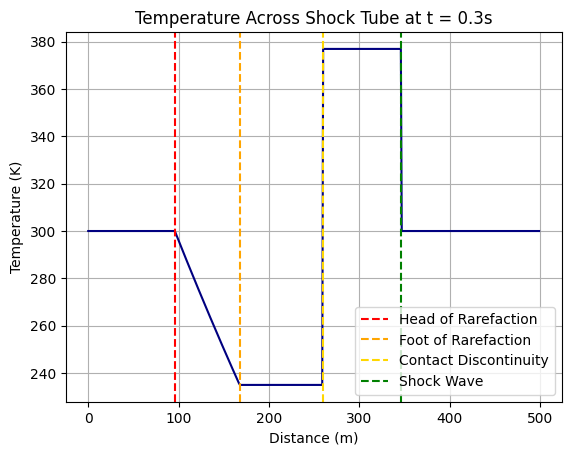

In [21]:
plt.plot(x_arr, T_arr, color='navy')
plt.axvline(x = xhd, color = 'red', linestyle='dashed', label='Head of Rarefaction')
plt.axvline(x = xft, color = 'orange', linestyle='dashed', label='Foot of Rarefaction')
plt.axvline(x = xcd, color = 'gold', linestyle='dashed', label='Contact Discontinuity')
plt.axvline(x = xsh, color = 'g', linestyle='dashed', label='Shock Wave')
plt.legend()
plt.ylabel('Temperature (K)')
plt.xlabel('Distance (m)')
plt.title(f'Temperature Across Shock Tube at t = {t}s')
plt.grid()
plt.show()

In [22]:
u1 = 0
u3 = u2
u4 = 0

This plot is to see the velocity distribution inside the shock tube at time `t`.

In [23]:
u_arr = np.zeros((points,))

for i in range(points):
    if i < xhd:
        u_arr[i] = u4
    elif i < xft:
        u_arr[i] = 2/gp1 * (a4 + (x_arr[i] - diaphragm)/t)
    elif i < xcd:
        u_arr[i] = u3
    elif i < xsh:
        u_arr[i] = u2
    else:
        u_arr[i] = u1

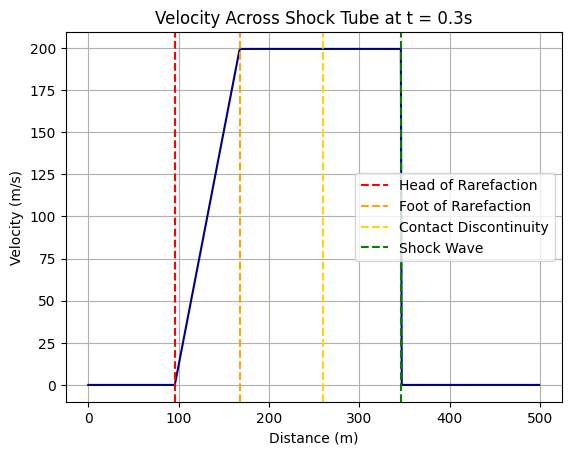

In [24]:
plt.plot(x_arr, u_arr, color='navy')
plt.axvline(x = xhd, color = 'red', linestyle='dashed', label='Head of Rarefaction')
plt.axvline(x = xft, color = 'orange', linestyle='dashed', label='Foot of Rarefaction')
plt.axvline(x = xcd, color = 'gold', linestyle='dashed', label='Contact Discontinuity')
plt.axvline(x = xsh, color = 'g', linestyle='dashed', label='Shock Wave')
plt.legend()
plt.ylabel('Velocity (m/s)')
plt.xlabel('Distance (m)')
plt.title(f'Velocity Across Shock Tube at t = {t}s')
plt.grid()
plt.show()

In [25]:
print('Head of Rarefaction: ', xhd)
print('Foot of Rarefaction: ', xft)
print('Contact Discontinuity: ', xcd)
print('Shock: ', xsh)

Head of Rarefaction:  95.84338715184715
Foot of Rarefaction:  167.64352113902214
Contact Discontinuity:  259.8334095579531
Shock:  346.0699748613657
